<a href="https://colab.research.google.com/github/sivianil/Structural-Bioinformatics/blob/main/Dihedral_Angle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install gemmi

     |████████████████████████████████| 3.1 MB 5.0 MB/s 


In [ ]:
from gemmi import cif

#read and parse a cif file
cif_file = cif.read_file("5keh.cif")



In [ ]:
frame = cif_file.sole_block()
frame.name

'5KEH'

In [ ]:
#Access values in loop
frame.find_loop('_atom_site.id')

#1492 atoms in the given protein structure

<gemmi.cif.Column _atom_site.id length 2099>

In [ ]:
#store the x coordinates of all atoms
cord_x = frame.find_values('_atom_site.Cartn_x')
len(cord_x)

2099

In [ ]:
#store the y and z coordinates of atoms
cord_y = frame.find_values('_atom_site.Cartn_y')
cord_z = frame.find_values('_atom_site.Cartn_z')

In [ ]:
cord_z[1218]

'25.581'

In [ ]:
table = frame.find(['_atom_site.Cartn_x', '_atom_site.Cartn_y', '_atom_site.Cartn_z'])

In [ ]:
import numpy as np

atom = np.array(frame.find_loop('_atom_site.group_PDB'))

**Exercise 1: Dihedral angle of the four atoms** 

In [ ]:
# https://math.stackexchange.com/questions/47059/how-do-i-calculate-a-dihedral-angle-given-cartesian-coordinates 
#function to calculate dihedral angle 
import sympy, math
def dihed_angle(X1,X2,X3,X4):
  #given the coordinates of four points, obtain vectors by vector substraction
  b1 = X1-X2
  b2 = X2-X3
  b3 = X3-X4

  #unit vector in the direction of the vectors b1,b2 and b3
  norm_b1 = b1/np.linalg.norm(b1)
  norm_b2 = b2/np.linalg.norm(b2)
  norm_b3 = b3/np.linalg.norm(b3)

  #compute normal vectors to the planes containing b1,b2 and b2,b3
  #using inbuilt function to compute cross product between two vectors
  n1 = np.cross(b1,b2)
  n2 = np.cross(b2,b3)

  #three vectors n1, b2 and cross product of n1 and b2 form an orthonormal plane
  norm_dot = np.dot(n1,n2)
  norm_cross = np.cross(n1, b2)

  x = norm_dot
  y = np.dot(norm_cross, n2)/np.linalg.norm(b2)
  
  #computes dihedral angle given four cartesian coordinates
  res = math.degrees(sympy.atan2(y,x)) 

  return res



In [ ]:
import numpy as np
X1 = np.array([0, 0, 1])
X2 = np.array([0, 0, 0])
X3 = np.array([1, 0, 0])
X4 = np.array([1, 1, 1])

print("The dihedral angle is: ", dihed_angle(X1,X2,X3,X4))

The dihedral angle is:  -45.0


In [ ]:
import numpy as np
X1 = np.array([0, 0, 1])
X2 = np.array([0, 0, 0])
X3 = np.array([1, 0, 0])
X4 = np.array([1, -1, 1])

print("The dihedral angle is: ", dihed_angle(X1,X2,X3,X4))

The dihedral angle is:  45.0


**Exercise 2: Phi/Psi angles for the Galectin 3c**

In [ ]:
#create a pandas data frame with columns containing label atom, label comp, seq id and cartesian cooordinates x,y,z

import pandas as pd
import numpy as np

atom = np.array(frame.find_loop('_atom_site.group_PDB'))

label_atom = np.array(frame.find(['_atom_site.label_atom_id']))
label_alt = np.array(frame.find(['_atom_site.label_alt_id']))
label_comp = np.array(frame.find(['_atom_site.label_comp_id']))
seq = np.array(frame.find(['_atom_site.auth_seq_id']))
#store the x, y and z coordinates of atoms
cord_x = np.array(frame.find_values('_atom_site.Cartn_x'))
cord_y = np.array(frame.find_values('_atom_site.Cartn_y'))
cord_z = np.array(frame.find_values('_atom_site.Cartn_z'))


In [ ]:
#select only protein atoms with their corresponding cartesian coordinates

prot_atom = len(np.argwhere(atom == "ATOM"))

label_atom = label_atom[:prot_atom]
label_alt = label_alt[:prot_atom]
label_comp = label_comp[:prot_atom]
seq = seq[:prot_atom]

In [ ]:
cord_x = cord_x[:prot_atom]
cord_y = cord_y[:prot_atom]
cord_z = cord_z[:prot_atom]

In [ ]:
label_alt[1218]

array(['.'], dtype='<U1')

In [ ]:
label_atom.ndim

2

In [ ]:
df = pd.DataFrame({'atom': label_atom.flatten(), 'alt': label_alt.flatten(), 'comp': label_comp.flatten(), 
                    'seq_id': seq.flatten(), 'Cartn_x': cord_x.flatten(), 'Cartn_y': cord_y.flatten(), 'Cartn_z': cord_z.flatten()})

In [ ]:
df.columns

Index(['atom', 'alt', 'comp', 'seq_id', 'Cartn_x', 'Cartn_y', 'Cartn_z'], dtype='object')

In [ ]:
df1 = df[df['atom'].isin(['N', 'CA', 'C'])]

In [ ]:
df1

,atom,alt,comp,seq_id,Cartn_x,Cartn_y,Cartn_z
0,N,.,ASN,30,21.885,-11.789,7.389
1,CA,.,ASN,30,21.312,-11.455,6.106
2,C,.,ASN,30,19.828,-11.196,6.314
5,N,.,GLY,31,19.418,-11.153,7.592
6,CA,.,GLY,31,18.007,-10.911,7.902
...,...,...,...,...,...,...,...
1860,CA,.,HIS,270,-11.610,-23.166,17.141
1861,C,.,HIS,270,-12.793,-23.779,17.872
1869,N,.,HIS,271,-13.883,-23.019,17.990
1870,CA,.,HIS,271,-15.061,-23.587,18.683


In [ ]:
#For some atoms, 2 coordinate sets are given. 'A' set is chosen for those atoms
df1 = df1[df1['alt'].isin(['.', 'A'])]

In [ ]:
df1 = df1.drop(columns = ['alt'])

In [ ]:
df1 = df1.convert_dtypes()
df1[["seq_id", "Cartn_x", "Cartn_y", "Cartn_z"]] = df1[["seq_id", "Cartn_x", "Cartn_y", "Cartn_z"]].apply(pd.to_numeric)

In [ ]:
df1.dtypes

atom        string
comp        string
seq_id       int64
Cartn_x    float64
Cartn_y    float64
Cartn_z    float64
dtype: object

In [ ]:
df1

,atom,comp,seq_id,Cartn_x,Cartn_y,Cartn_z
0,N,ASN,30,21.885,-11.789,7.389
1,CA,ASN,30,21.312,-11.455,6.106
2,C,ASN,30,19.828,-11.196,6.314
5,N,GLY,31,19.418,-11.153,7.592
6,CA,GLY,31,18.007,-10.911,7.902
...,...,...,...,...,...,...
1860,CA,HIS,270,-11.610,-23.166,17.141
1861,C,HIS,270,-12.793,-23.779,17.872
1869,N,HIS,271,-13.883,-23.019,17.990
1870,CA,HIS,271,-15.061,-23.587,18.683


In [ ]:
col_bind = df1['comp'] + df1['seq_id'].map(str)
df1['residue'] = col_bind

In [ ]:
df1 = df1.drop(columns = ['comp', 'seq_id'])
df1

,atom,Cartn_x,Cartn_y,Cartn_z,residue
0,N,21.885,-11.789,7.389,ASN30
1,CA,21.312,-11.455,6.106,ASN30
2,C,19.828,-11.196,6.314,ASN30
5,N,19.418,-11.153,7.592,GLY31
6,CA,18.007,-10.911,7.902,GLY31
...,...,...,...,...,...
1860,CA,-11.610,-23.166,17.141,HIS270
1861,C,-12.793,-23.779,17.872,HIS270
1869,N,-13.883,-23.019,17.990,HIS271
1870,CA,-15.061,-23.587,18.683,HIS271


In [ ]:
def psi(df):
  #create empty list to store the psi angles
  psi_angle = []
  seq = df.residue.unique()

  #No of residues or calpha atoms in given protein structure equal to 138
  j = 0
  for i in range(len(seq)):
    if np.all(np.array(df.iloc[j:j+4, 0]) == np.array(['N','CA','C','N'])):
      X1 = np.array(df.iloc[j, 1:4], dtype = "float64")
      X2 = np.array(df.iloc[j+1, 1:4], dtype = "float64")
      X3 = np.array(df.iloc[j+2, 1:4], dtype = "float64")
      X4 = np.array(df.iloc[j+3, 1:4], dtype = "float64")
      #adds each angle to the list
      psi_angle.append(dihed_angle(X1,X2,X3,X4))
      j = j+3
    else:
     psi_angle.append('NA')
  return psi_angle


In [ ]:
def phi(df):
  #create empty list to store the phi angles
  phi_angle = []
  seq = df.residue.unique()

  #No of residues or calpha atoms in given protein structure equal to 138
  j = 0
  for i in range(len(seq)):
    if np.all(np.array(df.iloc[j:j+4, 0]) == np.array(['C','N','CA','C'])):
      X1 = np.array(df.iloc[j, 1:4], dtype = "float64")
      X2 = np.array(df.iloc[j+1, 1:4], dtype = "float64")
      X3 = np.array(df.iloc[j+2, 1:4], dtype = "float64")
      X4 = np.array(df.iloc[j+3, 1:4], dtype = "float64")

      phi_angle.append(dihed_angle(X1,X2,X3,X4))
      j = j+3
    else:
      phi_angle.append('NA')
      j = j+2
     

  return phi_angle

In [ ]:
phi = phi(df1)

In [ ]:
psi = psi(df1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if __name__ == '__main__':


In [ ]:
phi[137]*math.pi/180

-1.9164710783271788

In [ ]:
phi_psi_dic = {}
for i in range(len(phi)):
  residue = df1.residue.unique()
  val = [phi[i], psi[i]]
  phi_psi_dic[residue[i]] = val

In [ ]:
phi_psi_dic 

{'ALA105': [-78.87176118869833, 159.32646486698926],
 'ALA106': [-70.28398763711441, 144.26813188559214],
 'ALA125': [-121.13012280683331, 122.93306506060676],
 'ALA131': [-50.18988390911156, 138.15969582069548],
 'ALA132': [-144.0432587428597, 169.73412384141164],
 'ALA134': [-131.77475827888844, 140.72120310503854],
 'ALA198': [-165.92460691242985, 161.37327468058788],
 'ALA209': [-163.32083336945448, 160.99508247414045],
 'ALA210': [-59.067404722311174, -43.521560500081556],
 'ALA214': [-122.3611777078118, 109.93433968333058],
 'ALA236': [-57.87292004881193, 143.43240262620782],
 'ALA256': [-80.42596270178257, 125.45553398939612],
 'ALA264': [-106.60887468168586, 163.62293101615018],
 'ALA36': [-72.90528657121632, -13.82425860921717],
 'ALA45': [-111.30634425404857, 146.60376653914338],
 'ALA78': [-149.10074778943644, 150.3539966857376],
 'ALA83': [-107.77399856410918, 137.26797575043298],
 'ALA86': [-63.60376602519056, 155.19764958930327],
 'ALA92': [-111.12742791932192, -9.2536855

**Exercise 3: Ramchandran Plot**

In [ ]:
# store phi and psi angles in x and y lists
x,y, ignored = [], [], []
for key, value in phi_psi_dic.items():
  if value[0] == 'NA' or value[1] == 'NA':
    ignored.append((key, value))
  else:
    x.append(value[0])
    y.append(value[1])    

In [ ]:
#ignored residues
ignored

[('ASN30', ['NA', 8.315527720452243]), ('HIS271', [-88.48264197288769, 'NA'])]

In [ ]:
import matplotlib.pyplot as plt
x = np.array(x)
y = np.array(y)

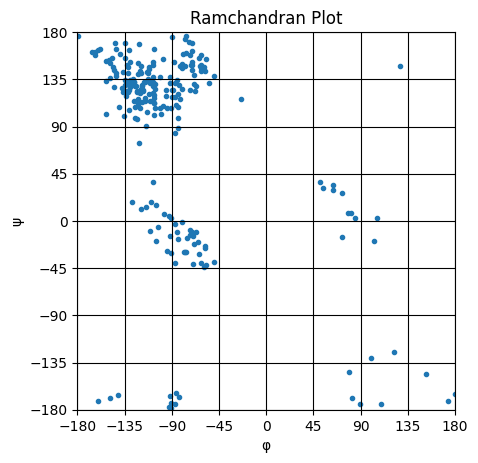

In [ ]:
plt.figure(figsize = [5.5, 5], dpi = 100)
ax = plt.subplot(111)
ax.set_title("Ramchandran Plot")


ax.set_aspect('equal')
ax.set_xlabel('\u03C6')
ax.set_ylabel('\u03C8')
ax.set_xlim(-180, 180)
ax.set_ylim(-180, 180)
ax.set_xticks([-180, -135, -90, -45, 0, 45, 90, 135, 180], minor=False)
ax.set_yticks([-180, -135, -90, -45, 0, 45, 90, 135, 180], minor=False)
plt.axhline(y=0, color='k', lw=0.5)
plt.axvline(x=0, color='k', lw=0.5)
plt.grid(b=None, which='major', axis='both', color='k')


ax.scatter(x, y, marker = '.')

plt.savefig('ramplot', format = 'pdf')
plt.show()

# Ramchandran plot using inbuilt functions RamchanDraw to compare with the plot generated by me

Each data point in the above plot represents combination of phi and psi angles occurs in a single amino acid. alpha-helical structure lies in the lower middle quadrant and beta-sheet lies in the upper left quadrant. The cluster of data represented in the bottom of the lower quadrant are turns. 

In [ ]:

from RamachanDraw import fetch, phi_psi, plot

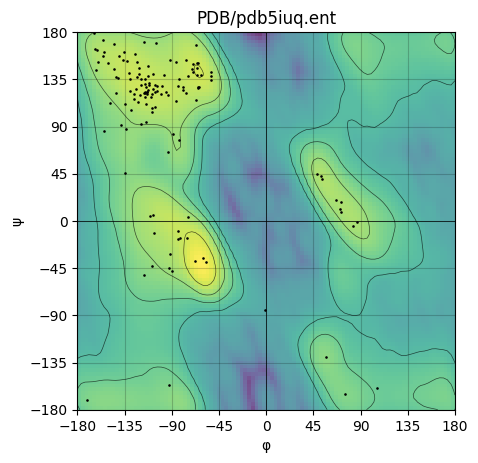

In [ ]:
PDB_id = '5IUQ'

plot(fetch(PDB_id))

In [ ]:
phi_psi_dict, ignored_res = phi_psi(fetch(PDB_id), return_ignored=True)

Structure exists: 'PDB/pdb5iuq.ent' 


             Ignored residues              
┏━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Aminoacid ┃             φ-ψ             ┃
┃ residue   ┃           angles            ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ PRO113    │  (None, 2.764489288852719)  │
│ ILE250    │ (-1.9164696019458334, None) │
└───────────┴─────────────────────────────┘

In [ ]:
angles = phi_psi(fetch(PDB_id), return_ignored=True)

Structure exists: 'PDB/pdb5iuq.ent' 


             Ignored residues              
┏━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Aminoacid ┃             φ-ψ             ┃
┃ residue   ┃           angles            ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ PRO113    │  (None, 2.764489288852719)  │
│ ILE250    │ (-1.9164696019458334, None) │
└───────────┴─────────────────────────────┘